In [1]:
import pandas as pd
import numpy as np
import os
import datetime as dt
import calendar
from matplotlib import pyplot as plt
import scipy.stats as stats
import glob

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from mpl_toolkits.mplot3d import Axes3D  #3Dplot
import seaborn as sns
import japanize_matplotlib

In [2]:
files = glob.glob('../../../卒論関連書類/データ/king_history/king_history1/*')
version = len(files)-1
df_king =pd.read_csv(f'../../../卒論関連書類/データ/king_history/king_history1/king{version}.csv',converters={'DateTime':pd.to_datetime})

cols = ['DateTime', 'intra_price(円/kWh)', 'spot_price(円/kWh)',
       'gap_price[intra-spot](円/kWh)']

df_select = df_king[cols].dropna()

In [57]:
# start end 範囲を決める
# とりあえず全体

start_point = dt.datetime(2018,1,1,0,0)
end_point =dt.datetime(2023,12,31,23,30)

In [118]:

def Hist_bunpu(start_point,end_point):
    df = df_select[(df_select['DateTime']>=start_point)&(df_select['DateTime']<=end_point)]
    gap = df['gap_price[intra-spot](円/kWh)'].values


    fig = plt.figure(figsize=(6,6))
    ax1 = fig.add_subplot(1,1,1)
    ax1.hist(gap,bins=int(len(gap)/100))

    ax1.set_xticks(ax1.get_xticks())
    ax1.set_xticklabels(np.array(ax1.get_xticks(),dtype=int),fontname='Times New Roman',)

    ax1.set_yticks(ax1.get_yticks())
    ax1.set_yticklabels(np.array(ax1.get_yticks(),dtype=int),fontname='Times New Roman',)
    ax1.set_xlabel('Yen / kWh',fontname='Times New Roman',fontsize=16)
    ax1.set_ylabel('出現回数（回）',fontname='MS Mincho',fontsize=16)
    plt.title(f'価格差の分布（{start_point.date()}－{end_point.date()}）',fontname=['Times New Romans','MS Mincho'])
    text = f' Max {round(gap.max(),1)} Yen/kWh\n Min {round(gap.min(),1)} Yen/kWh\n Mean {round(gap.mean(),1)} Yen/kWh\n SD {round(gap.std(),1)} Yen/kWh'
    plt.text(ax1.get_xticks()[-4],ax1.get_yticks()[-3],text,fontname='Times New Roman')

    plt.savefig(f'../../../卒論関連書類/画像/3章画像/分析結果画像/価格差の分布/maxminあり{start_point.date()}－{end_point.date()}.png')

    plt.show()

In [219]:

def QQPLOT(start_point,end_point):
    df = df_select[(df_select['DateTime']>=start_point)&(df_select['DateTime']<=end_point)]
    gap = df['gap_price[intra-spot](円/kWh)'].values


    fig = plt.figure(figsize=(6,6))
    ax1 = fig.add_subplot(1,1,1)
    # ax1.hist(gap,bins=int(len(gap)/100))
    stats.probplot(gap,dist='norm',plot=ax1)

    ax1.set_xticks(ax1.get_xticks())
    ax1.set_xticklabels(np.array(ax1.get_xticks(),dtype=int),fontname='Times New Roman',)

    ax1.set_yticks(ax1.get_yticks())
    ax1.set_yticklabels(np.array(ax1.get_yticks(),dtype=int),fontname='Times New Roman',)
    ax1.set_xlabel('Theoritical Quantiles',fontname='Times New Roman',fontsize=16)
    ax1.set_ylabel('Ordered Values',fontname='Times New Roman',fontsize=16)
    ax1.get_lines()[0].set_marker('o')
    ax1.get_lines()[0].set_markerfacecolor('gray')
    ax1.get_lines()[0].set_markeredgecolor('gray')
    ax1.get_lines()[1].set_linewidth(2)
    ax1.get_lines()[1].set_color('black')
   
    




    plt.title(f'Probability Plot   {start_point.date()}  {end_point.date()}',fontname = ['Times New Roman'],fontsize=16)
    pv = stats.kstest(gap,stats.norm(loc=gap.mean(),scale=gap.std()**2).cdf)[1]
    # text = f' Max {round(gap.max(),1)} Yen/kWh\n Min {round(gap.min(),1)} Yen/kWh\n Mean {round(gap.mean(),1)} Yen/kWh\n SD {round(gap.std(),1)} Yen/kWh'
    text= f'K-S test: p={pv}\nMean {round(gap.mean(),1)} Yen/kWh\nSD {round(gap.std(),1)}  Yen/kWh'
    plt.text(ax1.get_xticks()[1],ax1.get_yticks()[-3],text,fontname = 'Times New Roman',fontsize=12)

    plt.savefig(f'../../../卒論関連書類/画像/3章画像/分析結果画像/価格差QQ/Prob{start_point.date()}－{end_point.date()}.png')

    plt.show()

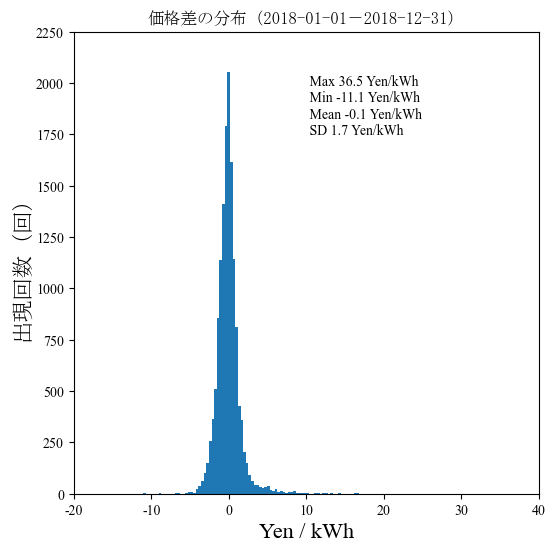

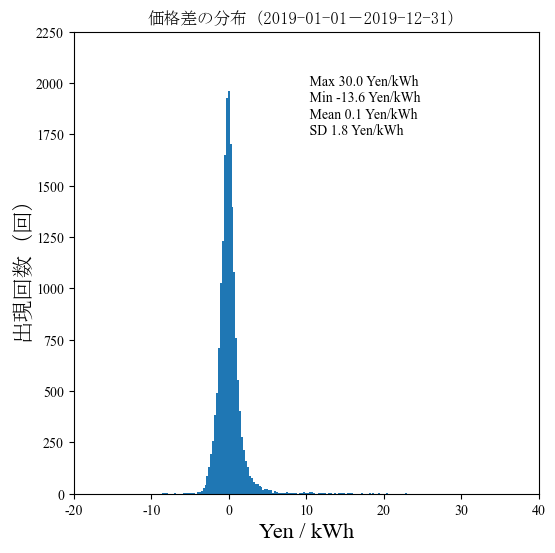

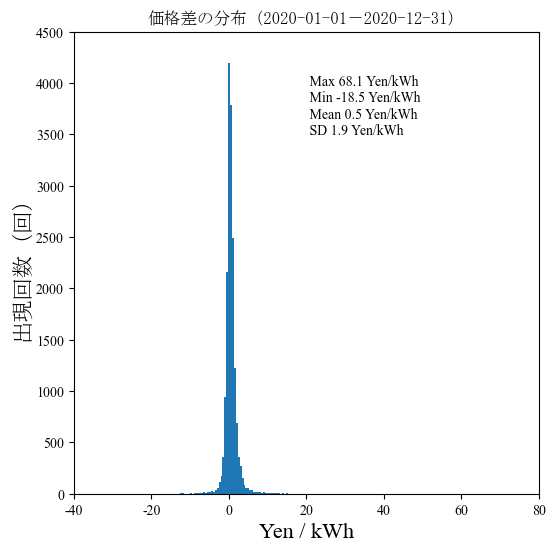

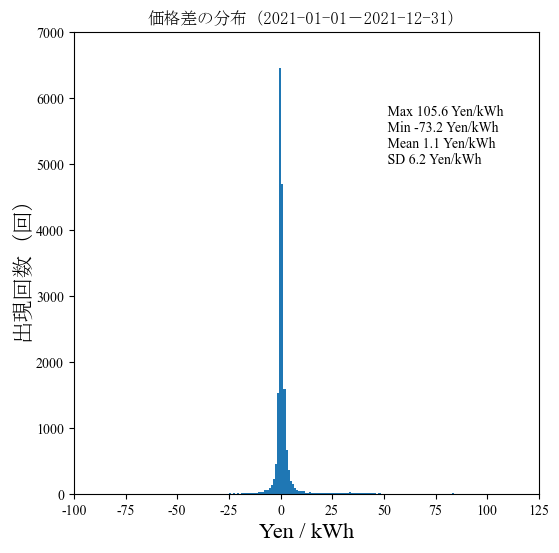

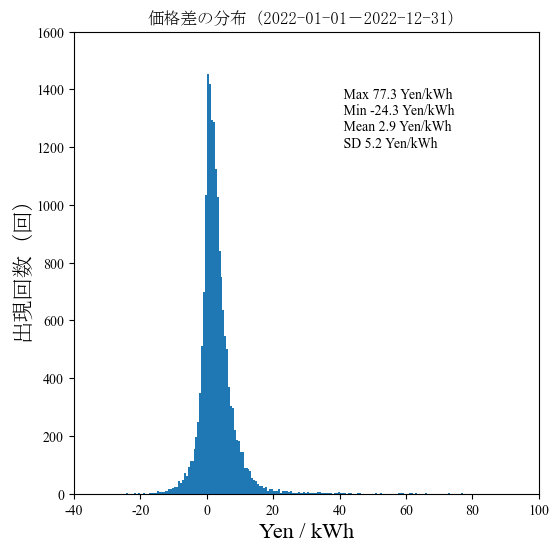

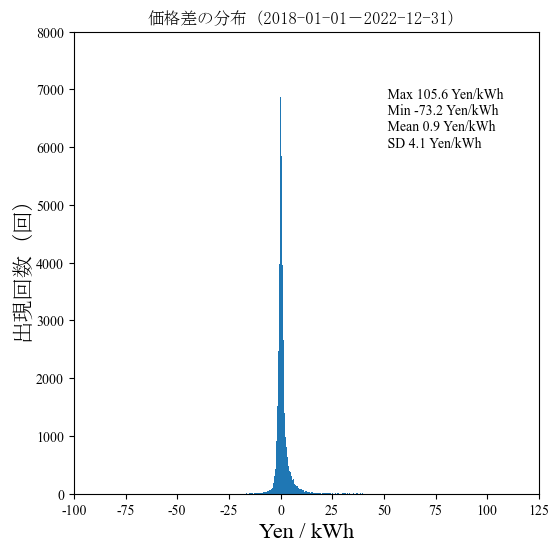

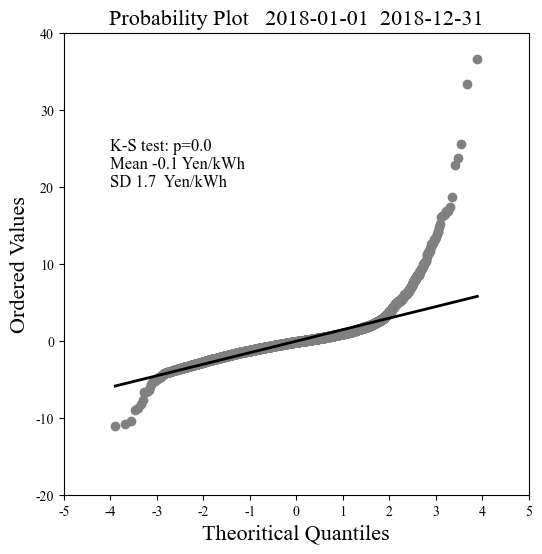

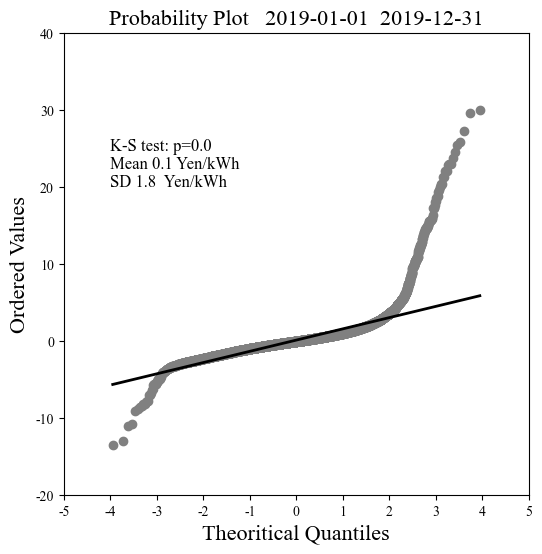

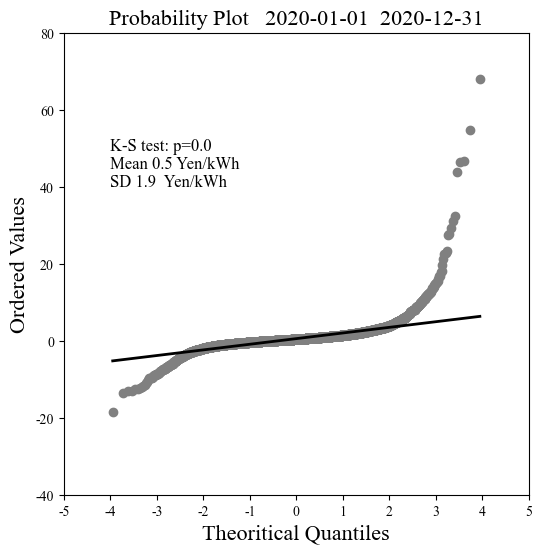

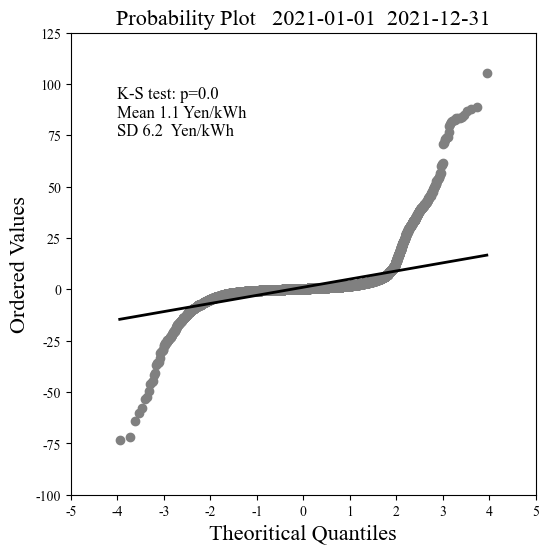

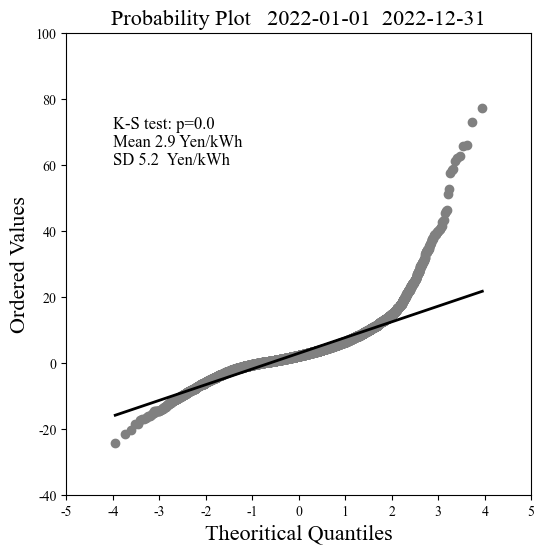

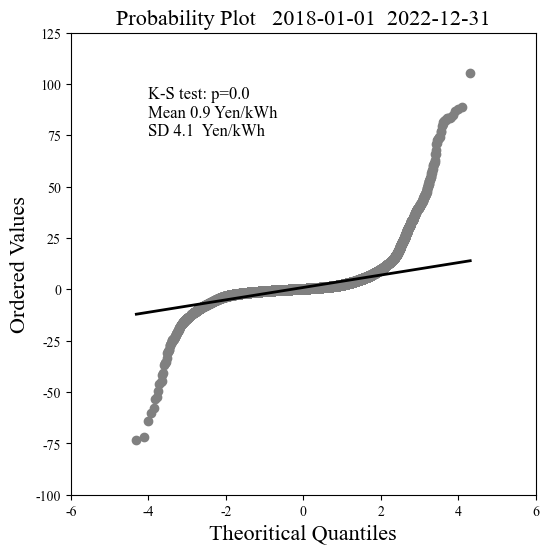

In [223]:
# 各年価格差分布
for year in range(2018,2023):
    Hist_bunpu(dt.datetime(year,1,1,0,0),dt.datetime(year,12,31,23,30))
# 全ねん
Hist_bunpu(dt.datetime(2018,1,1,0,0),dt.datetime(2022,12,31,23,30))

# QQPLOT各年
for year in range(2018,2023):
    QQPLOT(dt.datetime(year,1,1,0,0),dt.datetime(year,12,31,23,30))
# 全年
QQPLOT(dt.datetime(2018,1,1,0,0),dt.datetime(2022,12,31,23,30))

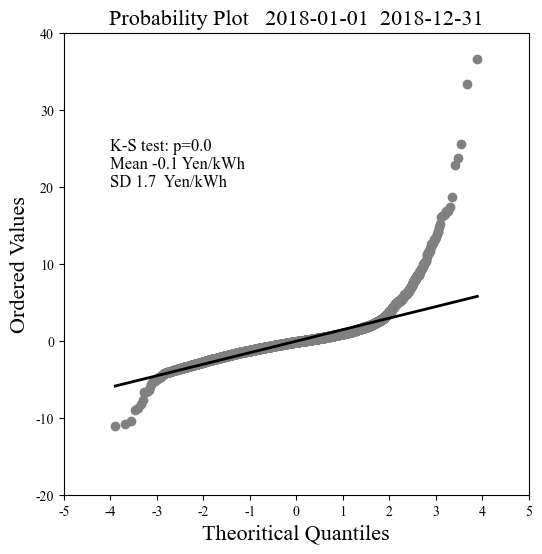

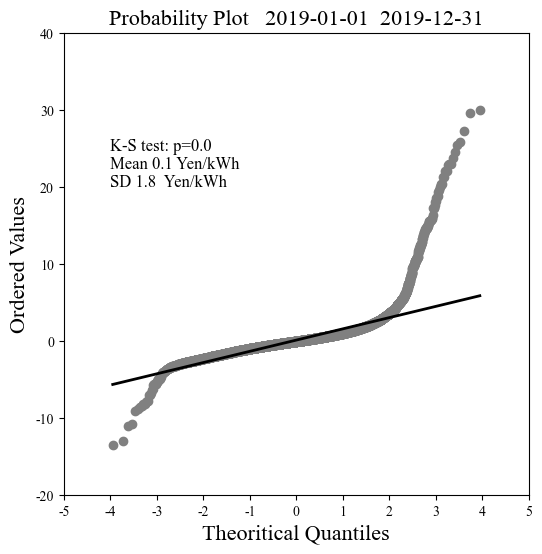

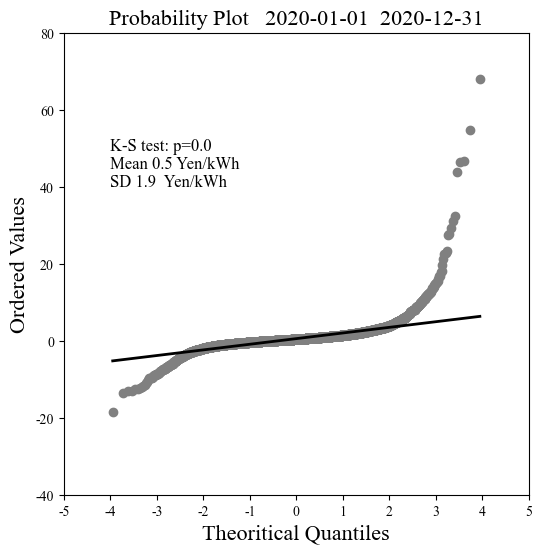

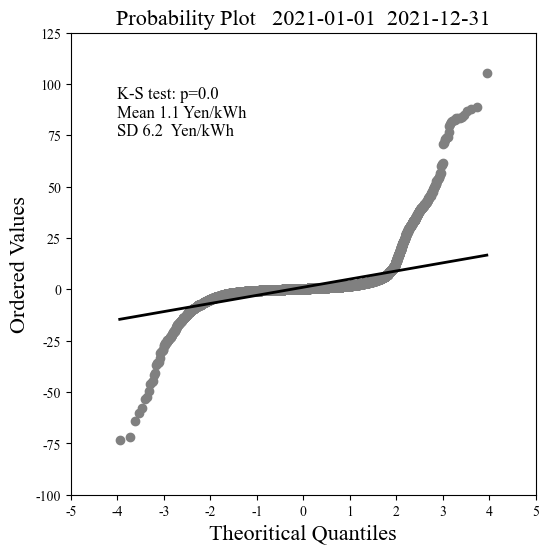

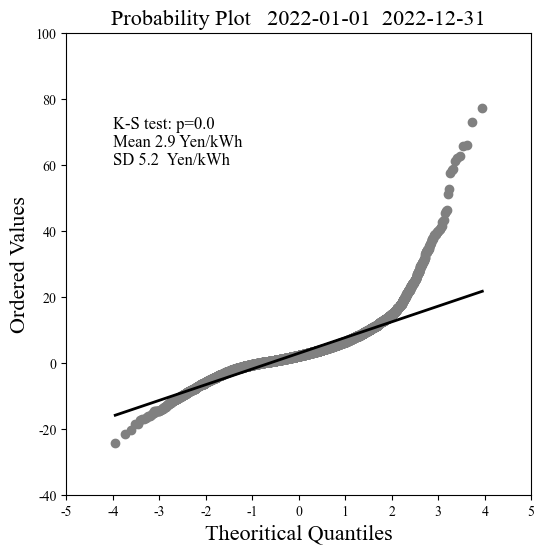

In [221]:
# 各年QQプロット
for year in range(2018,2023):
    QQPLOT(dt.datetime(year,1,1,0,0),dt.datetime(year,12,31,23,30))



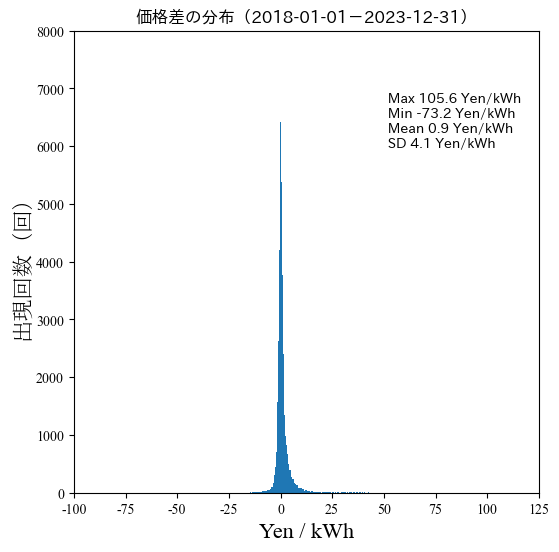

In [95]:
df = df_select[(df_select['DateTime']>=start_point)&(df_select['DateTime']<=end_point)]
gap = df['gap_price[intra-spot](円/kWh)'].values


fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(1,1,1)
ax1.hist(gap,bins=int(len(gap)/100))

ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels(np.array(ax1.get_xticks(),dtype=int),fontname='Times New Roman',)

ax1.set_yticks(ax1.get_yticks())
ax1.set_yticklabels(np.array(ax1.get_yticks(),dtype=int),fontname='Times New Roman',)
ax1.set_xlabel('Yen / kWh',fontname='Times New Roman',fontsize=16)
ax1.set_ylabel('出現回数（回）',fontname='MS Mincho',fontsize=16)
plt.title(f'価格差の分布（{start_point.date()}－{end_point.date()}）')
# text = f'Max {round(gap.max(),1)} Yen/kWh\n Min {round(gap.min(),1)} Yen/kWh'
text = f' Max {round(gap.max(),1)} Yen/kWh\n Min {round(gap.min(),1)} Yen/kWh\n Mean {round(gap.mean(),1)} Yen/kWh\n SD {round(gap.std(),1)} Yen/kWh'
plt.text(ax1.get_xticks()[-4],ax1.get_yticks()[-3],text)

# plt.savefig(f'../../../卒論関連書類/画像/3章画像/分析結果画像/価格差の分布/{start_point.date()}－{end_point.date()}.png')
plt.savefig(f'../../../卒論関連書類/画像/3章画像/分析結果画像/価格差の分布/minmaxあり{start_point.date()}－{end_point.date()}.png')
plt.show()


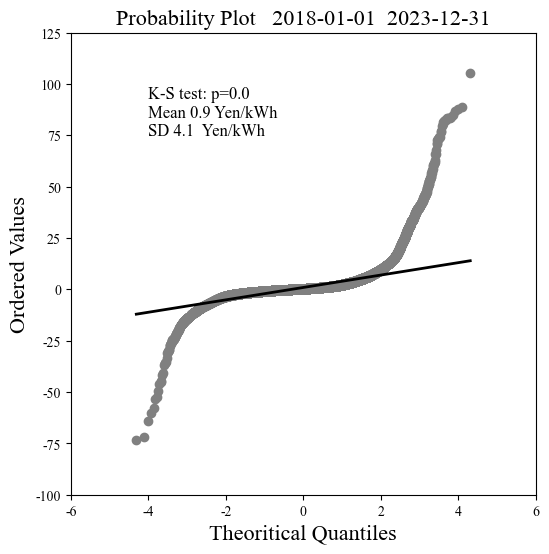

In [220]:
QQPLOT(start_point,end_point)

In [184]:
# K-S検定（コルモゴロフ-スミルノフ検定）
pv = stats.kstest(gap,stats.norm(loc=gap.mean(),scale=gap.std()**2).cdf)[1]
pv

0.0

(array([2.0000e+00, 1.0000e+00, 2.0000e+00, 3.0000e+00, 3.0000e+00,
        2.0000e+00, 5.0000e+00, 1.1000e+01, 2.6000e+01, 7.3000e+01,
        3.7900e+02, 5.3680e+03, 7.1588e+04, 5.1700e+03, 1.0100e+03,
        2.6600e+02, 1.5100e+02, 1.1600e+02, 7.8000e+01, 4.9000e+01,
        2.0000e+01, 1.3000e+01, 9.0000e+00, 3.0000e+00, 8.0000e+00,
        5.0000e+00, 9.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([-73.18 , -67.221, -61.262, -55.303, -49.344, -43.385, -37.426,
        -31.467, -25.508, -19.549, -13.59 ,  -7.631,  -1.672,   4.287,
         10.246,  16.205,  22.164,  28.123,  34.082,  40.041,  46.   ,
         51.959,  57.918,  63.877,  69.836,  75.795,  81.754,  87.713,
         93.672,  99.631, 105.59 ]),
 <BarContainer object of 30 artists>)

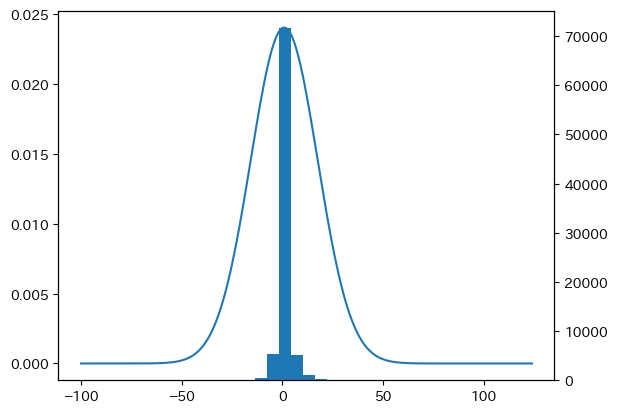

In [193]:
x_ = np.array(range(-100,125))
pdf_norm1 = stats.norm.pdf(x_,loc=gap.mean(),scale=gap.std()**2)

fig= plt.figure()
ax1=fig.subplots()
ax1.plot(x_,pdf_norm1)

ax2 = ax1.twinx()
ax2.hist(gap,bins=30)

In [183]:
stats.norm(loc=1,scale=5).cdf

TypeError: pdf() missing 1 required positional argument: 'x'

((array([-4.30858171, -4.10816072, -3.9990903 , ...,  3.9990903 ,
          4.10816072,  4.30858171]),
  array([-73.18, -71.98, -64.18, ...,  87.88,  88.67, 105.59])),
 (3.0198529238528464, 0.9369004302324214, 0.7412920807171711))

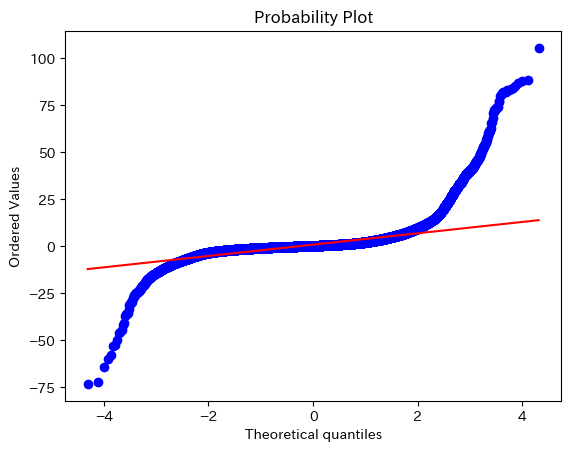

In [102]:
stats.probplot(gap,dist='norm',plot = plt)

In [98]:
qqplot(gap,line='r')

NameError: name 'qqplot' is not defined

In [101]:
stats.shapiro(gap)

ShapiroResult(statistic=0.5497204661369324, pvalue=0.0)

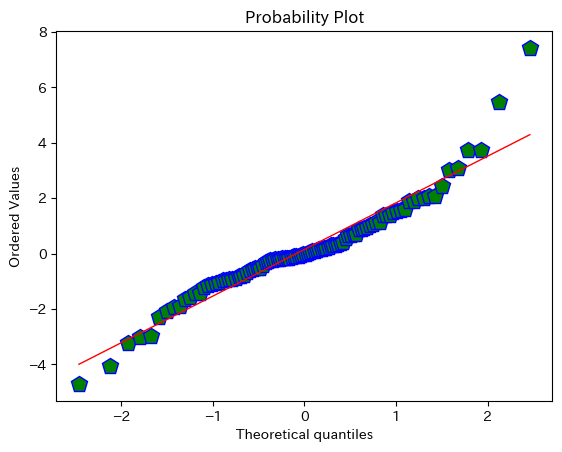

In [173]:
nsample = 100
np.random.seed(7654321)

fig = plt.figure()
ax = fig.add_subplot(111)
x = stats.t.rvs(3, size=nsample)
res = stats.probplot(x, plot=plt)

ax.get_lines()[0].set_marker('p')
ax.get_lines()[0].set_markerfacecolor('g')
ax.get_lines()[0].set_markersize(12.0)

ax.get_lines()[1].set_linewidth(1.0)

plt.show()

